# convolutional  neural network

In [2]:
car_image="/content/car1 (1).jpeg"

In [3]:
car_image

'/content/car1 (1).jpeg'

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [5]:
img=cv2.imread(car_image)

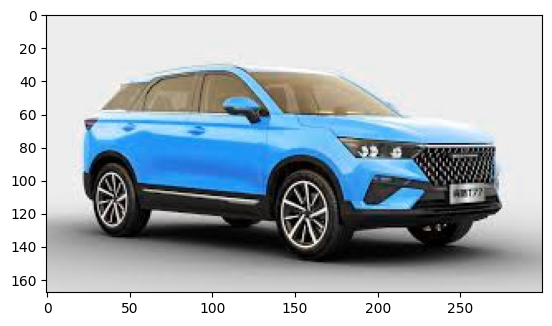

In [6]:
plt.imshow(img)  # by defualt matplotlib consider the BGR we need to convert into rgb

In [7]:
img.shape # this is the given dimension

(168, 300, 3)

In [8]:
window="img"



In [9]:
IMG3=cv2.cvtColor(img, cv2. COLOR_BGR2RGB)

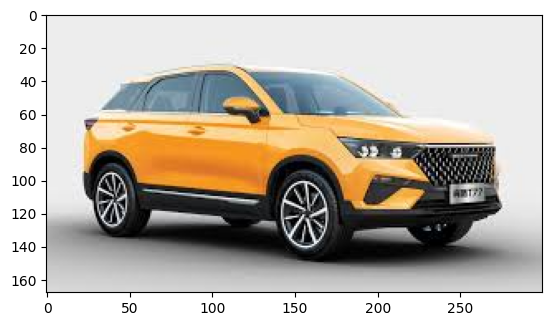

In [10]:
plt.imshow(IMG3)

In [11]:
IMG2=cv2.cvtColor(img , cv2.COLOR_BGR2GRAY) # converted bgr into grey

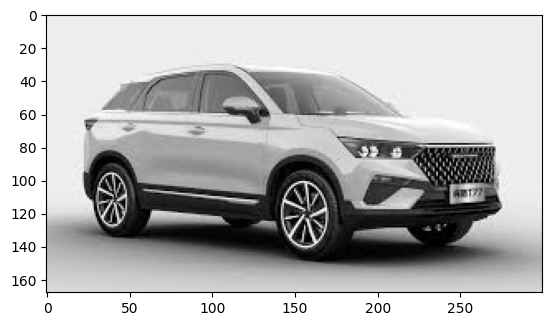

In [12]:
plt.imshow(IMG2,cmap="gray")

In [13]:
from google.colab.patches import cv2_imshow # google colab provide defualt function for reading the original image

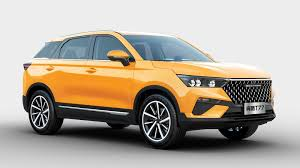

In [14]:
cv2_imshow(img)

In [15]:
import tensorflow as tf
from tensorflow import keras

In [16]:
row,column=IMG2.shape
print(row)
print(column)
car=IMG2.reshape(1,row,column,1) # reshap the given image
car.shape


168
300


(1, 168, 300, 1)

In [17]:
# defining the first convolution layers
Conv_layers = [tf.keras.layers.Conv2D(
        filters=(1),
        kernel_size=(3,3),
        input_shape=car.shape[1:], # whenever we are providing the image to model it  should be (2,3,3,1)
        strides=(1,1)
    )]


In [18]:
model=tf.keras.Sequential(Conv_layers)

In [19]:
model.summary() # there are total 10 learnable parameter : the size of kernel 3*3+1 (add bias for each layers)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 166, 298, 1)       10        
                                                                 
Total params: 10 (40.00 Byte)
Trainable params: 10 (40.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
output=model.predict(car)

1/1 [==============================] - 1s 1s/step


In [21]:
#shape of convoulted image
output.shape  # (n+2p-f/s) +1 formula to calculate the convoulated image pixels

(1, 166, 298, 1)

In [22]:
rows,column=output.shape[1:-1]

In [23]:
reshape_image=output.reshape(rows,column)

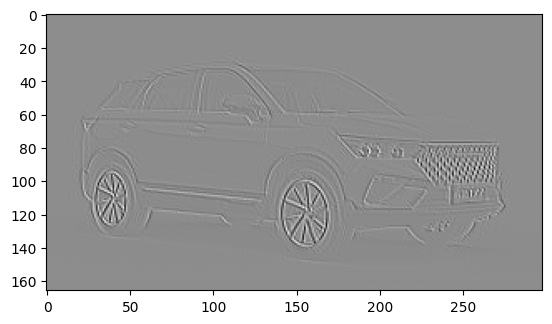

In [24]:
plt.imshow(reshape_image,cmap="gray") # this is convoluted image

In [25]:
row,col,depth=IMG3.shape

In [26]:
reshape_img=IMG3.reshape(1,row,col,depth)

In [27]:
reshape_img.shape

(1, 168, 300, 3)

In [28]:
conv_2D=[tf.keras.layers.Conv2D(
    filters=(1),
    kernel_size=(3,3),
    input_shape=reshape_img.shape[1:],
    strides=(1,1)
)]

In [29]:
model=tf.keras.Sequential(conv_2D)

In [30]:
model.summary() # here  trainable parameter can be calculated by using (3,3)*3+1

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 166, 298, 1)       28        
                                                                 
Total params: 28 (112.00 Byte)
Trainable params: 28 (112.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
output=model.predict(reshape_img) # this is convoluted image

1/1 [==============================] - 0s 130ms/step


In [32]:
row,col=output.shape[1:-1]  # the loss of information is there because of  convoultion

In [33]:
reshape_img1=output.reshape(row,col)

# color image after convolution

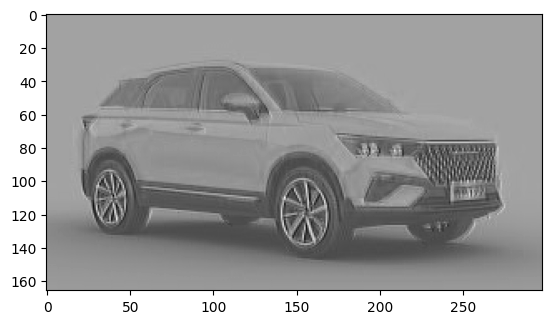

In [34]:
plt.imshow(reshape_img1, cmap='gray')

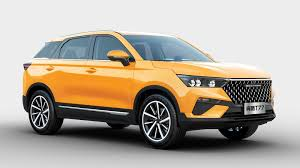

In [39]:
cv2_imshow(img)

In [45]:
IMG3.shape

(168, 300, 3)

# check on multiple filters
1. applied max pooling
2. apply padding
3.

In [40]:
def reshaping_in(img, grayscale=True):
  if grayscale:
    row,col = img.shape
    img = img.reshape(1,row,col,1) # grayscale
    return img
  row,col,depth = img.shape
  color_img = img.reshape(1,row,col,depth) # colored
  return color_img

In [41]:
def max_pooling(img, pool_size=(2,2), strides=(2,2)):
  reshaped_img = reshaping_in(img,grayscale=False)
  pooling_layer = tf.keras.layers.MaxPool2D(pool_size=pool_size, strides=strides)
  result = pooling_layer(reshaped_img)
  return result

In [46]:
result=max_pooling(IMG3)

In [47]:
#tensor
result.shape

TensorShape([1, 84, 150, 3])

In [48]:
def plot(result):
  _,row,col,_=result.shape
  reshaped_img=tf.reshape(result,(row,col,3))
  plt.imshow(reshaped_img)

In [49]:
def reshaping_in(img, grayscale=True):
  if grayscale:
    row,col = img.shape
    img = img.reshape(1,row,col,1) # grayscale
    return img
  row,col,depth = img.shape
  color_img = img.reshape(1,row,col,depth) # colored
  return color_img

In [50]:
def get_conv_model(filters=1, filter_size=(3,3), strides=(1,1), input_shape=None, padding="valid"):
  CONV_LAYER = [tf.keras.layers.Conv2D(filters=filters,
                                      kernel_size=filter_size,
                                      strides=(1,1),
                                      input_shape=input_shape,
                                      padding=padding)]

  conv_model = tf.keras.Sequential(CONV_LAYER)
  conv_model.summary()
  return conv_model


In [51]:
def apply_conv_model_and_visualize(img, conv_model):
  try:
    out = conv_model.predict(img)
    print(out.shape)
    row, col, depth = out.shape[1:]
    reshape_out = out.reshape(row, col, depth)

    for d in range(depth):
      plt.imshow(reshape_out[:,:,d], cmap="gray")
      plt.show()

  except Exception as e:
    raise e

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 166, 298, 10)      280       
                                                                 
Total params: 280 (1.09 KB)
Trainable params: 280 (1.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1/1 [==============================] - 0s 80ms/step
(1, 166, 298, 10)


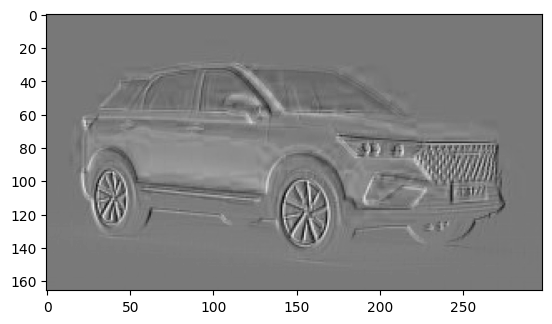

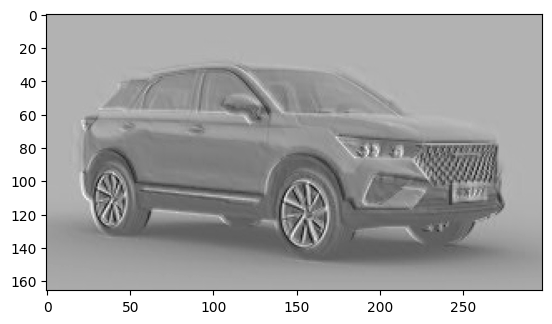

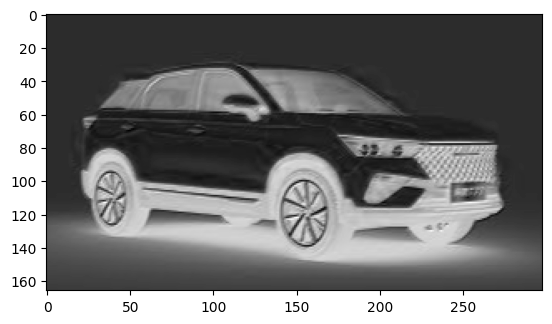

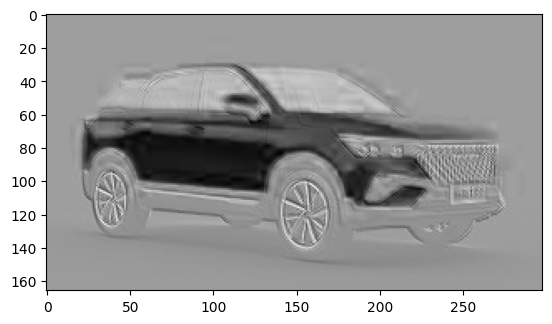

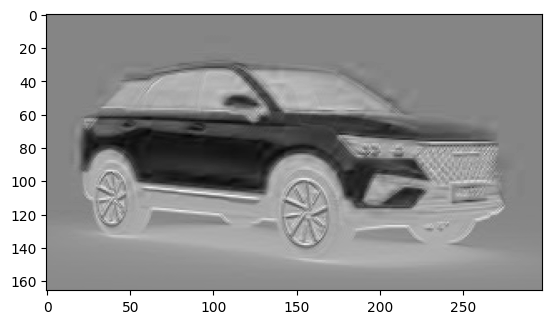

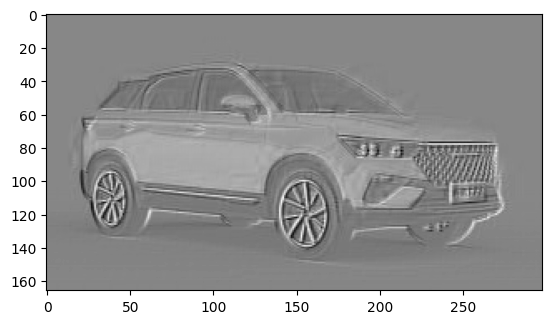

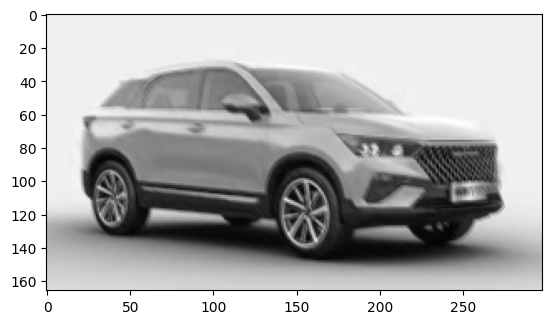

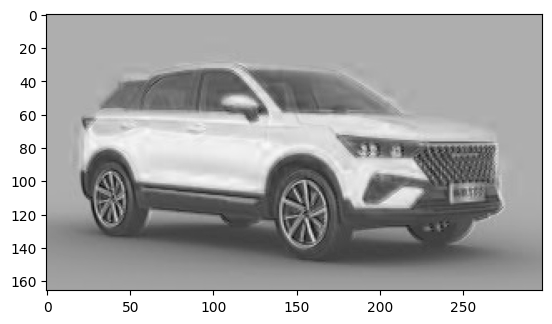

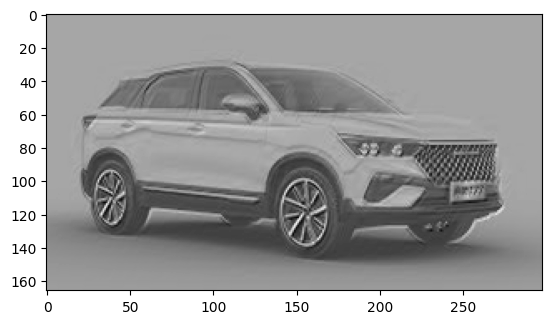

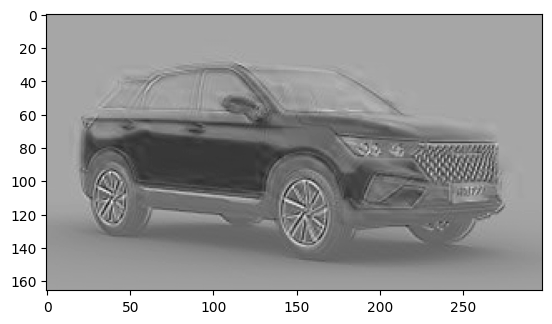

In [53]:
input_img=reshaping_in(IMG3,grayscale=False)
model=get_conv_model(filters=10,filter_size=(3,3),strides=(1,1),input_shape=input_img.shape[1:])
apply_conv_model_and_visualize(input_img,model)